In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data, header = pyxdf.load_xdf('decoding_data/shaked.xdf')

Stream 2: Calculated effective sampling rate 119.9992 Hz is different from specified rate 90.0000 Hz.


data[1] - eye tracker 

channel 23: x left

channel 24: y left

channel 25: x right

channel 26: y right

data[2] - triggers

In [5]:
x_left_avg = []
y_left_avg = []
x_right_avg = []
y_right_avg = []
triggers = data[2]['time_stamps']
for i in range(len(triggers)-1):
    start = triggers[i]
    end = triggers[i + 1]
    if end-start > 50:
        #break in exp
        continue
    eye_time = data[1]['time_stamps']
    flag = 1
    for j in range(len(eye_time)):   
        if eye_time[j] > start and flag:
            first = j
            flag = 0
        elif eye_time[j] > end:
            last = j
            flag = 1
            break
    eye_data = data[1]['time_series']
    x_left_avg.append(np.nanmean(eye_data[0:,23][first + 352:first + 396]))
    y_left_avg.append(np.nanmean(eye_data[0:,24][first + 352:first + 396]))
    x_right_avg.append(np.nanmean(eye_data[0:,25][first + 352:first + 396]))
    y_right_avg.append(np.nanmean(eye_data[0:,26][first + 352:first + 396]))

In [6]:
lables = (pd.read_csv('decoding_data/labeling.csv')).to_numpy()
shuffle = (pd.read_csv('decoding_data/shuffle_order_shaked.csv')).to_numpy()

In [7]:
d = {'label':[], 'x_left':[], 'y_left':[], 'x_right':[],'y_right':[]}
for idx, image_idx in enumerate(shuffle[:,1]):
    if np.isnan(x_left_avg[idx]) or np.isnan(y_left_avg[idx]) or np.isnan(x_right_avg[idx]) or np.isnan(y_right_avg[idx]):
        continue
    d['label'].append(lables[image_idx][3])
    d['x_left'].append(x_left_avg[idx])
    d['y_left'].append(y_left_avg[idx])
    d['x_right'].append(x_right_avg[idx])
    d['y_right'].append(y_right_avg[idx])
final_data = pd.DataFrame(data=d)

In [ ]:
final_data.to_csv('decoding_data/pre_shaked9.csv')

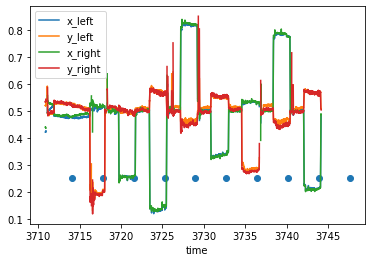

In [8]:
# left_gaze_point_on_display_area

plt.plot(data[1]['time_stamps'][1000:5000],data[1]['time_series'][0:,23][1000:5000])
plt.plot(data[1]['time_stamps'][1000:5000],data[1]['time_series'][0:,24][1000:5000])
plt.plot(data[1]['time_stamps'][1000:5000],data[1]['time_series'][0:,25][1000:5000])
plt.plot(data[1]['time_stamps'][1000:5000],data[1]['time_series'][0:,26][1000:5000])
plt.scatter(data[2]['time_stamps'][0:10],(data[2]['time_series'][0:10]/4),marker='o')
plt.xlabel('time')
plt.legend(['x_left', 'y_left', 'x_right', 'y_right'])
x = np.arange(len(data[1]['time_series'][0:,23][1000:5000]))
for i in data[2]['time_stamps']:
    pass
plt.show()